In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math, random

In [3]:
from scipy.special import softmax

In [63]:
def countX(lst, x):
    return lst.count(x)

In [175]:
psweet = [1.0]  #  List of probabilities of the action to go to sweetLogo
punsweet = [0]
uchoices = []  #  Choices to go to unsweetLogo
schoices = []  #  Choices to go to sweetLogo

beta = 1  #  Exploitation-exploration parameter
epsi = .6  #  Learning rate parameter
epsiloss = .6  #  Learning rate parameter
alpha = .5

ms = 1  #  Estimated reward of sweet logo
mu = 0  #  Estimated reward of unsweet logo

reward_count = [] # list to keep number of rewards
state = ['s1','s2'] # states
count = 3 # initial count
choices = ['unsweet'] #initial other choices
total_reward = []

for i in range(44):
    si = state[0] # always starts at s1
    if si == 's1': # real reward probabilities 
        rs = 1
        ru = 0
    else:
        rs = 0
        ru = 1

    pui = 1/(1+math.exp(np.negative(beta)*(mu-ms))) #probability of unsweet
    psi = 1/(1+math.exp(np.negative(beta)*(ms-mu))) #probability of sweet
    psweet.append(psi)
    punsweet.append(pui)
    
    if pui < psi: # if probability of sweet is greater than unsweet choose sweet
        choice = 'sweet'
        choices.append(choice)
        schoices.append(1)
        uchoices.append(0)
        if si == 's1':
            reward_count.append(1)
            total_reward.append(1)
            ms = ms + epsi*(rs-ms) #update estimate
        else:
            total_reward.append(0)
            ms = ms + epsiloss*(rs-ms) #update estimate
    elif pui > psi: # if probability of unsweet is greater than sweet choose unsweet
        choice = 'unsweet'
        choices.append(choice)
        schoices.append(0)
        uchoices.append(1)
        if si == 's2':
            reward_count.append(1)
            total_reward.append(1)
            mu = mu + epsi*(ru-mu) #update estimate
        else:
            total_reward.append(0)
            mu = mu + epsiloss*(ru-mu) #update estimate
    elif pui == psi: # if the probabilities are 50 50 
        x = countX(choices, choices[-1]) # rely on previous choice
        mod = countX(total_reward, total_reward[1]) # modify alpha based on previous correct or incorrect 
        mod = (mod/len(total_reward))
        alpha = alpha*mod
        print(alpha)
        prob = (x/len(choices))*alpha # estimate probability of previous choice with alpha
        if prob > 0.5:
            choice = choices[-1] 
            print(choice)
        elif prob < 0.5:
            if choices[-1] == 'sweet':
                choice = 'unsweet'
            else:
                choice = 'sweet'
        else:
            choice = random.choice(choices) # if still 50 50 random selection
            print('random!')
        choices.append(choice)
        if choice == 'sweet':
            schoices.append(1)
            uchoices.append(0)
            if si == 's1':
                reward_count.append(1)
                total_reward.append(1)
                ms = ms + epsi*(rs-ms)
            else:
                total_reward.append(0)
                ms = ms + epsiloss*(rs-ms)
        else:
            choice = 'unsweet'
            choices.append(choice)
            schoices.append(0)
            uchoices.append(1)
            if si == 's2':
                reward_count.append(1)
                total_reward.append(1)
                mu = mu + epsi*(ru-mu)
            else:
                total_reward.append(0)
                mu = mu + epsiloss*(ru-mu)
    if len(reward_count) >= count:
        state.reverse()
        count = random.randint(3, 5)
        reward_count = []
        print('flip!')


flip!
0.03488372093023256


In [176]:
total_reward

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

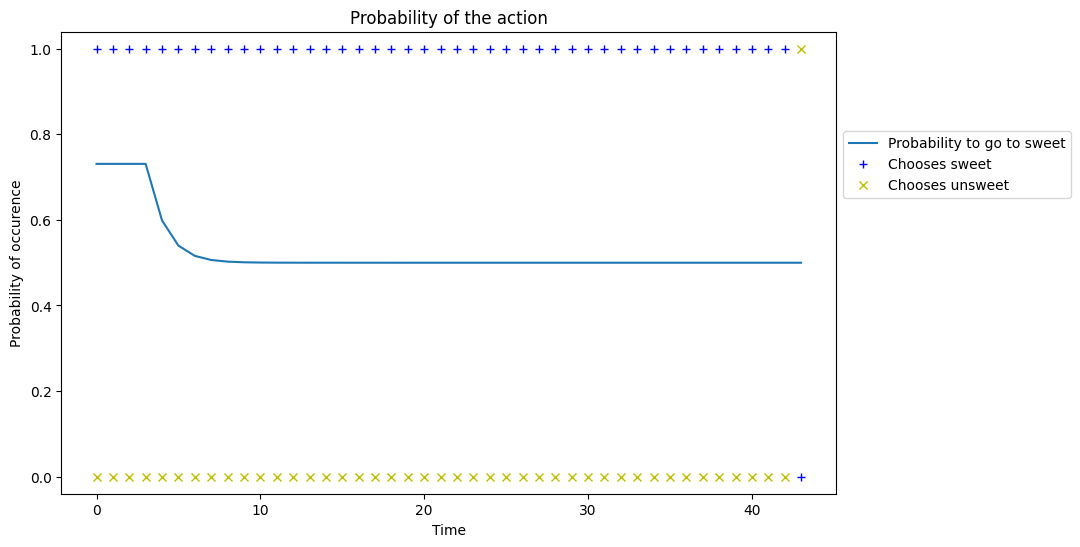

In [177]:
time = np.arange(0, 44, 1)
psweet.pop(0)
plot = plt.subplot()

plot.plot(time, psweet, label='Probability to go to sweet')
plot.plot(time, schoices, '+b', label='Chooses sweet')
plot.plot(time, uchoices, 'xy', label='Chooses unsweet')
plt.title('Probability of the action')
plt.xlabel('Time')
plt.ylabel('Probability of occurence')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.ylim(-0.04, 1.04)
plt.show()